In [26]:
# load some data to practice regressions
import seaborn as sns
import numpy as np
diamonds = sns.load_dataset('diamonds')

# this alteration is not strictly necessary to practice a regression
# but we use this in livecoding
diamonds2 = (diamonds.query('carat < 2.5')               # censor/remove outliers
            .assign(lprice = np.log(diamonds['price']))  # log transform price
            .assign(lcarat = np.log(diamonds['carat']))  # log transform carats
            .assign(ideal = diamonds['cut'] == 'Ideal') 
             
             # some regression packages want you to explicitly provide 
             # a variable for the constant
            .assign(const = 1)                           
            )  

## method 1: statsmodels.api

In [27]:
import statsmodels.api as sm  

y = diamonds2['lprice']
X = diamonds2[['const','lcarat']]

model1 = sm.OLS(y,X)                # pick model type and specify model features
results1 = model1.fit()             # estimate / fit
print(results1.summary())           # view results 
y_predicted1 = results1.predict()   # get the predicted results
residuals1 = results1.resid         # get the residuals
#residuals1 = y - y_predicted1      # another way to get the residuals

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:10:34   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4525      0.001   6193.432      0.0

## there has to be a better way. Example:2

In [28]:
from statsmodels.formula.api import ols as sm_ols
model2   = sm_ols('lprice ~ lcarat',  # specify model (you don't need to include the constant!)
                  data=diamonds2)
results2 = model2.fit()               # estimate / fit
print(results2.summary())             # view results ... identical to before

# the prediction and residual and plotting are the exact same

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:10:34   Log-Likelihood:                -4073.2
No. Observations:               53797   AIC:                             8150.
Df Residuals:                   53795   BIC:                             8168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.4525      0.001   6193.432      0.0

## visualize regressions

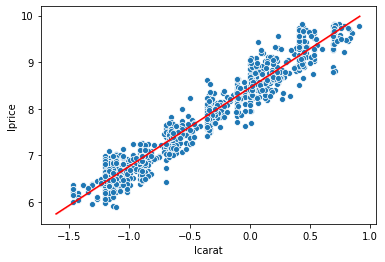

In [29]:
#sns.regplot
#sns.lmplot

import matplotlib.pyplot as plt

# let's plot our data with the OLS predicted fit
sns.scatterplot(x='lcarat',y='lprice',data=diamonds2.sample(1000)) # sampled just to avoid overplotting
sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')

Text(0.5, 1.0, 'Which is the same fit sns will give')

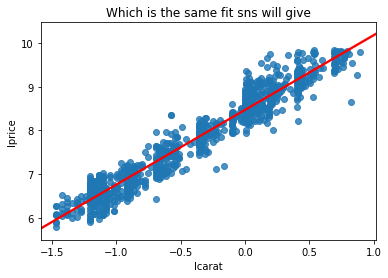

In [30]:
# compare this to the built-in sns produces
plt.show()
sns.regplot(x='lcarat',y='lprice',data=diamonds2.sample(1000),
            line_kws={'color':'red'}).set_title("Which is the same fit sns will give")

In [31]:
diamonds2['lprice_predict_error']=results1.resid  # the residuals, the prediction errors

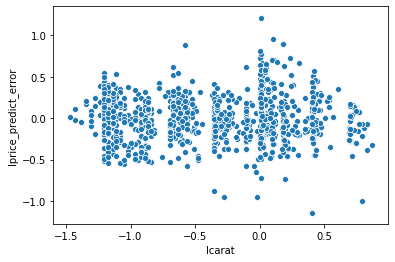

In [32]:
sns.scatterplot(x='lcarat',y='lprice_predict_error',data=diamonds2.sample(1000))

In [33]:
diamonds2['lprice_predict']=results1.predict()
diamonds2['price_predict']=np.exp(diamonds2['lprice_predict']) #residual

In [34]:
diamonds2.iloc[:,-7:].describe() #regression errors are always avg=0 (If you include constant)

,lprice,lcarat,const,lprice_predict_error,lprice_predict,price_predict
count,53797.000000,53797.000000,53797.0,5.379700e+04,53797.000000,53797.000000
mean,7.781923,-0.398700,1.0,-6.316737e-15,7.781923,3771.138812
std,1.011557,0.581060,0.0,2.610050e-01,0.977305,3700.038164
min,5.786897,-1.609438,1.0,-1.361775e+00,5.745541,312.792742
25%,6.854355,-0.916291,1.0,-1.700728e-01,6.911370,1003.621032
50%,7.781556,-0.356675,1.0,-6.028933e-03,7.852608,2572.433260
75%,8.573952,0.039221,1.0,1.659037e-01,8.518479,5006.430921
max,9.842835,0.912283,1.0,1.341449e+00,9.986913,21740.076097


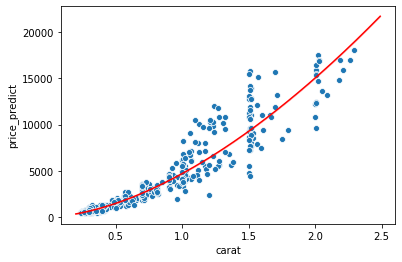

In [35]:
g=sns.scatterplot(data=diamonds2.sample(500), y='price', x='carat')
sns.lineplot(data=diamonds2, y='price_predict', x='carat', color='red')

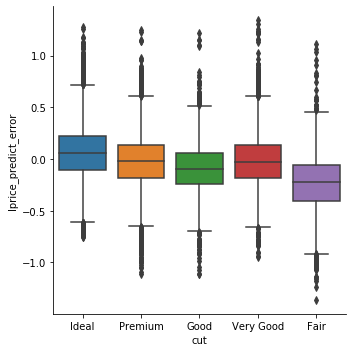

In [36]:
sns.catplot(data=diamonds2, y='lprice_predict_error', x='cut', kind='box')

In [37]:
#### let's work here
sm_ols('lprice~ lcarat + x', data=diamonds2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 3.789e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:10:44   Log-Likelihood:                -3957.1
No. Observations:               53797   AIC:                             7920.
Df Residuals:                   53794   BIC:                             7947.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.7340      0.047    164.086      0.000       7.642       7.826
lcarat         1.4719      0.014    105.852      0.000       1.445       1.499
x              0.1109      0.007     15.250      0.000       0.097       0.125
==============================================================================
Omnibus:                      861.522   Durbin-Watson:                   1.239
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1526.077
Skew:                           0.114   Prob(JB):                         0.00
Kurtosis:                       3.793   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# exercise time...
#% increase in price for ideal diamonds..
sm_ols('lprice~ carat + ideal', data=diamonds2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                 1.655e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:10:44   Log-Likelihood:                -24032.
No. Observations:               53797   AIC:                         4.807e+04
Df Residuals:                   53794   BIC:                         4.810e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         6.1387      0.004   1656.718      0.000       6.131       6.146
ideal[T.True]     0.0717      0.003     21.264      0.000       0.065       0.078
carat             2.0368      0.004    570.680      0.000       2.030       2.044
==============================================================================
Omnibus:                     1907.568   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2652.335
Skew:                          -0.371   Prob(JB):                         0.00
Kurtosis:                       3.795   Cond. No.                         4.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### questions
If x (the diamonds 2 variable "x") goes up by
A.    1%, how much does price go up?
B.    1, how much does price go up?
C.    1%, what % does price go up?
D.    1, what % does price go up?

In [40]:
sm_ols('lprice~x', data=diamonds2).fit().summary()  #87%....Part D
sm_ols('price~x', data=diamonds2).fit().summary()  #PArt B= $3,3,137
sm_ols('price~lx', data=diamonds2.assign(lx=np.log(1+diamonds2['x']))
      ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                 1.393e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:10:55   Log-Likelihood:            -4.8745e+05
No. Observations:               53797   AIC:                         9.749e+05
Df Residuals:                   53795   BIC:                         9.749e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.454e+04    103.384   -334.082      0.000   -3.47e+04   -3.43e+04
lx          2.032e+04     54.439    373.243      0.000    2.02e+04    2.04e+04
==============================================================================
Omnibus:                    36969.119   Durbin-Watson:                   0.348
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2403694.165
Skew:                           2.641   Prob(JB):                         0.00
Kurtosis:                      35.318   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
ideal_reg=sm_ols('lprice~lcarat + ideal',
                data=diamonds2).fit()
diamonds2['y_pred_ideal']=ideal_reg.predict()

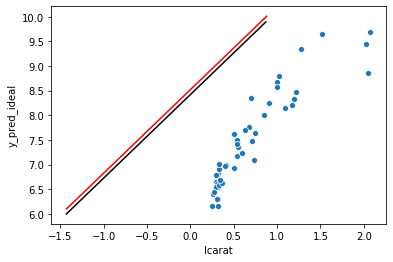

In [42]:
g=sns.scatterplot(data=diamonds2.sample(50), y='lprice', x='carat')
sns.lineplot(data=diamonds2.query('ideal==True').sample(50), 
             y='y_pred_ideal', x='lcarat', color='red')
sns.lineplot(data=diamonds2.query('ideal==False').sample(50), 
             y='y_pred_ideal', x='lcarat', color='black')

In [43]:
sm_ols('lprice~lcarat + ideal',
      data=diamonds2).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 3.914e+05
Date:                Thu, 26 Mar 2020   Prob (F-statistic):               0.00
Time:                        19:10:59   Log-Likelihood:                -3136.4
No. Observations:               53797   AIC:                             6279.
Df Residuals:                   53794   BIC:                             6306.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4182      0.002   5415.779      0.000       8.415       8.421
ideal[T.True]     0.1000      0.002     43.662      0.000       0.096       0.105
lcarat            1.6963      0.002    878.286      0.000       1.692       1.700
==============================================================================
Omnibus:                      794.680   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1394.941
Skew:                           0.101   Prob(JB):                    1.24e-303
Kurtosis:                       3.763   Cond. No.                         2.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
diamonds2['lcarat'].describe()

count    53797.000000
mean        -0.398700
std          0.581060
min         -1.609438
25%         -0.916291
50%         -0.356675
75%          0.039221
max          0.912283
Name: lcarat, dtype: float64